In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('Network_anomaly_data.csv')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df.shape

(125973, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [ ]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [ ]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   duration                125973 non-null  int64   
 1   protocoltype            125973 non-null  object  
 2   service                 125973 non-null  object  
 3   flag                    125973 non-null  object  
 4   srcbytes                125973 non-null  int64   
 5   dstbytes                125973 non-null  int64   
 6   land                    125973 non-null  category
 7   wrongfragment           125973 non-null  category
 8   urgent                  125973 non-null  category
 9   hot                     125973 non-null  int64   
 10  numfailedlogins         125973 non-null  int64   
 11  loggedin                125973 non-null  category
 12  numcompromised          125973 non-null  int64   
 13  rootshell               125973 non-null  category
 14  suat

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df[df.duplicated()]

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,attack_category


In [ ]:
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)

In [ ]:
df['logduration'] = np.log(df['duration']+1)

In [ ]:
pd.DataFrame(df['duration'].describe()).T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.14465,2604.51531,0.0,0.0,0.0,0.0,42908.0


<Axes: xlabel='duration'>

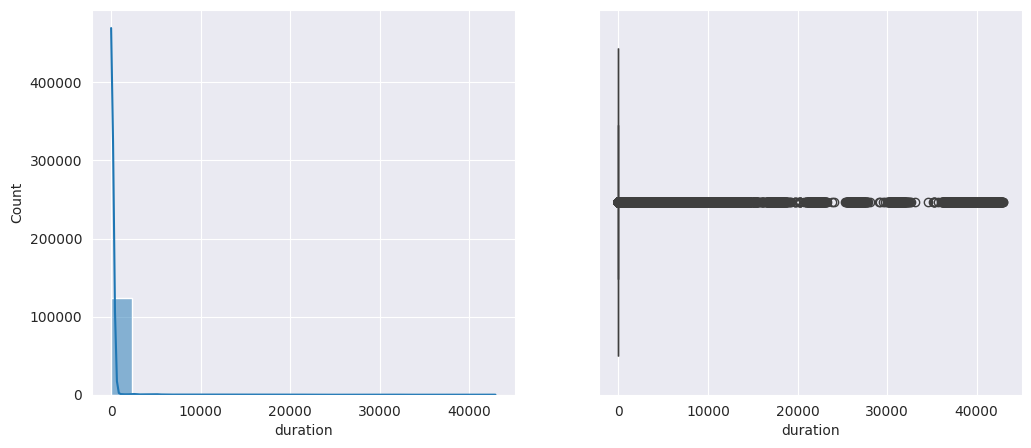

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='duration',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='duration')

In [ ]:
df['protocoltype'].value_counts()

,count
protocoltype,
tcp,102689
udp,14993
icmp,8291


In [ ]:
df['service'].value_counts().head()

,count
service,
http,40338
private,21853
domain_u,9043
smtp,7313
ftp_data,6860


<Axes: xlabel='service'>

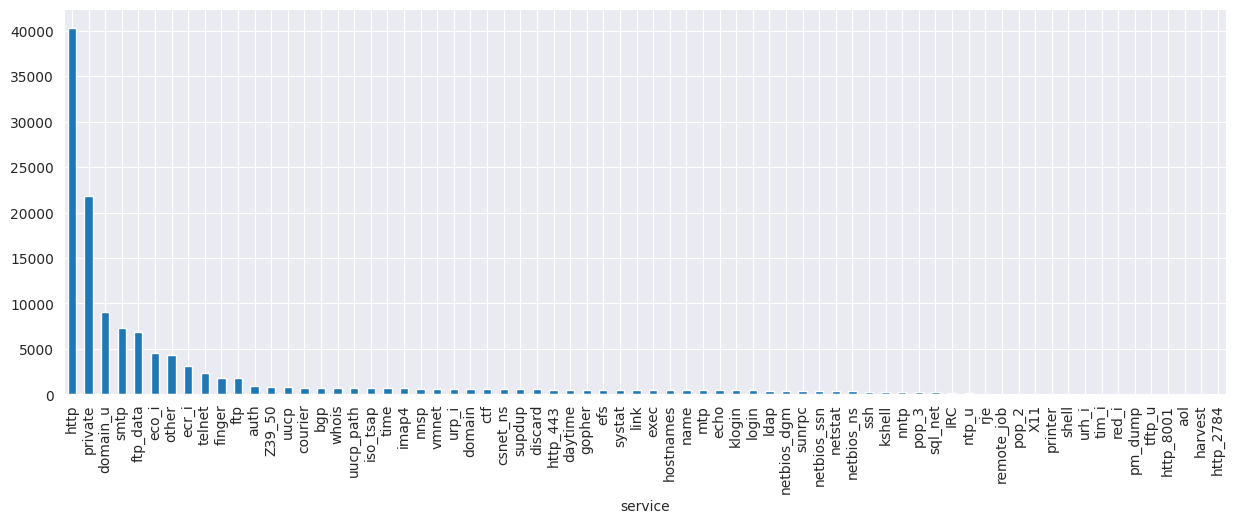

In [ ]:
plt.figure(figsize=(15,5))
df['service'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
pd.pivot_table(data=df,index='flag',columns='attack_category',values='count',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
flag,,,,,,,
OTH,NaN,NaN,NaN,NaN,11.0,35.0,46
REJ,NaN,NaN,5671.0,NaN,2693.0,2869.0,11233
RSTO,46.0,NaN,1216.0,1.0,219.0,80.0,1562
RSTOS0,NaN,NaN,NaN,NaN,NaN,103.0,103
RSTR,5.0,90.0,NaN,NaN,146.0,2180.0,2421
S0,NaN,NaN,34344.0,NaN,354.0,153.0,34851
S1,1.0,2.0,NaN,NaN,361.0,1.0,365
S2,1.0,5.0,NaN,NaN,119.0,2.0,127
S3,3.0,NaN,NaN,NaN,45.0,1.0,49


<Axes: xlabel='flag'>

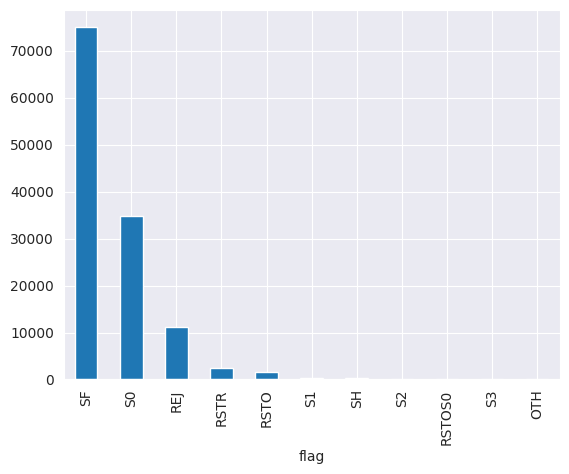

In [ ]:
df['flag'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
pd.DataFrame(df['srcbytes'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srcbytes,125973.0,45566.743,5.870331e+06,0.0,0.0,44.0,276.0,1.379964e+09


In [ ]:
df['srcbytes'].max()

1379963888

<Axes: xlabel='srcbytes'>

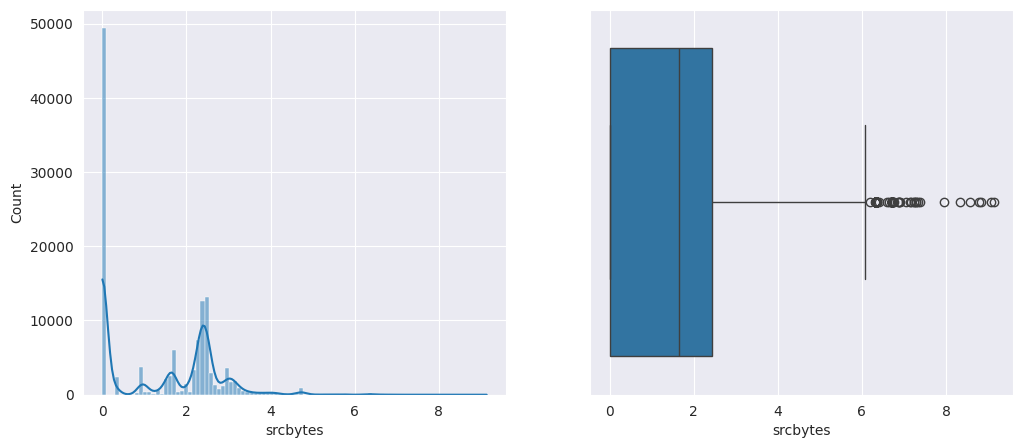

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(np.log10(df['srcbytes']+1),kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log10(df['srcbytes']+1))

In [ ]:
pd.DataFrame(df['dstbytes'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dstbytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.0,516.0,1.309937e+09


<Axes: xlabel='dstbytes'>

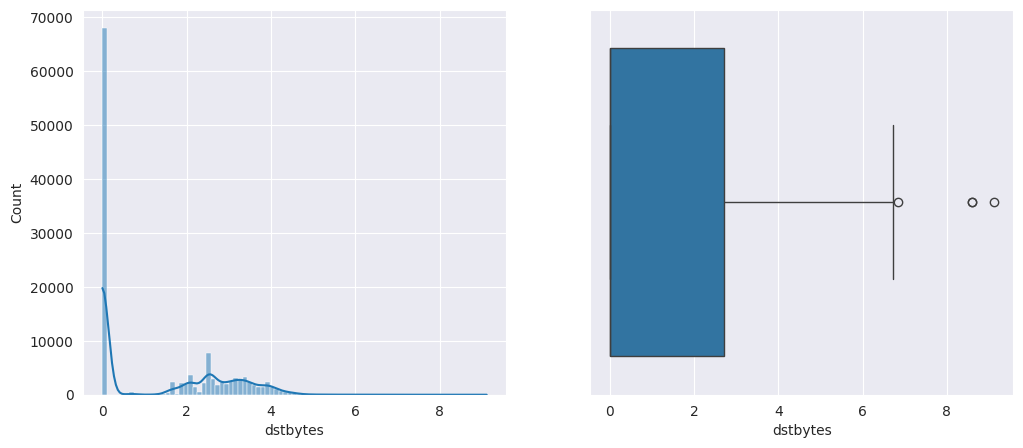

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(np.log10(df['dstbytes']+1),kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log10(df['dstbytes']+1))

In [ ]:
df['land'].value_counts()

,count
land,
0,125948
1,25


In [ ]:
df['wrongfragment'].value_counts(normalize=True)

,proportion
wrongfragment,
0,0.991347
3,0.007017
1,0.001635


In [ ]:
df['urgent'].value_counts()

,count
urgent,
0,125964
1,5
2,3
3,1


In [ ]:
df['hot'].nunique()

28

In [ ]:
pd.DataFrame(df['hot'].describe()).T

,count,mean,std,min,25%,50%,75%,max
hot,125973.0,0.204409,2.149968,0.0,0.0,0.0,0.0,77.0


<Axes: xlabel='hot'>

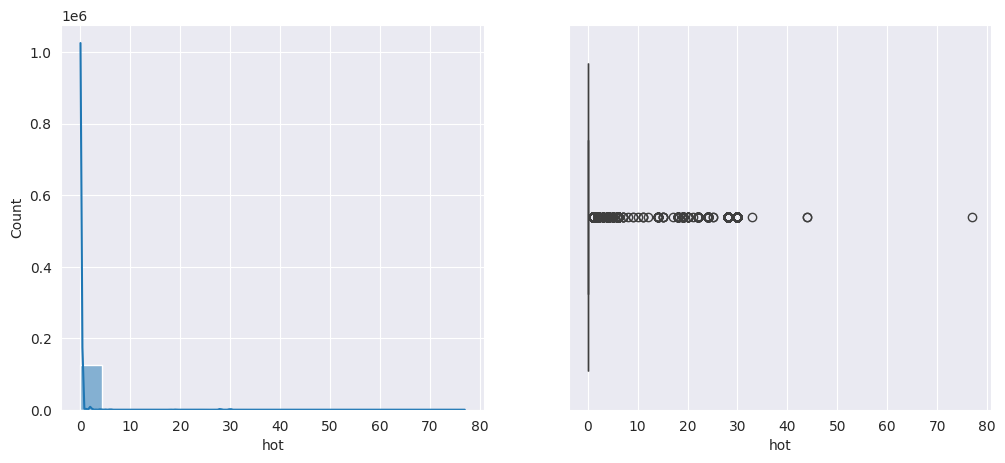

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='hot',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='hot')

In [ ]:
df['numfailedlogins'].value_counts(normalize=True)

,proportion
numfailedlogins,
0,0.999032
1,0.000826
2,0.000071
3,0.000040
4,0.000024
5,0.000008


In [ ]:
df['loggedin'].value_counts(normalize=True)

,proportion
loggedin,
0,0.604264
1,0.395736


In [ ]:
pd.DataFrame(df['numcompromised'].describe()).T

,count,mean,std,min,25%,50%,75%,max
numcompromised,125973.0,0.27925,23.942042,0.0,0.0,0.0,0.0,7479.0


<Axes: xlabel='numcompromised'>

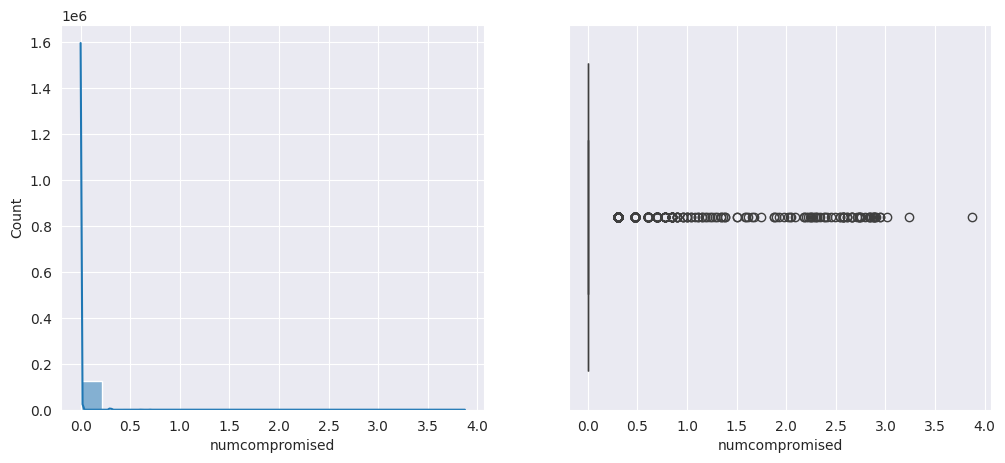

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(np.log10(df['numcompromised']+1),kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log10(df['numcompromised']+1))

In [ ]:
df['rootshell'].value_counts(normalize=True)

,proportion
rootshell,
0,0.998658
1,0.001342


In [ ]:
df['suattempted'].value_counts(normalize=True)

,proportion
suattempted,
0,0.999365
2,0.000468
1,0.000167


In [ ]:
df['numroot'].nunique()

82

In [ ]:
pd.DataFrame(df['numroot'].describe()).T

,count,mean,std,min,25%,50%,75%,max
numroot,125973.0,0.302192,24.399618,0.0,0.0,0.0,0.0,7468.0


<Axes: xlabel='numroot'>

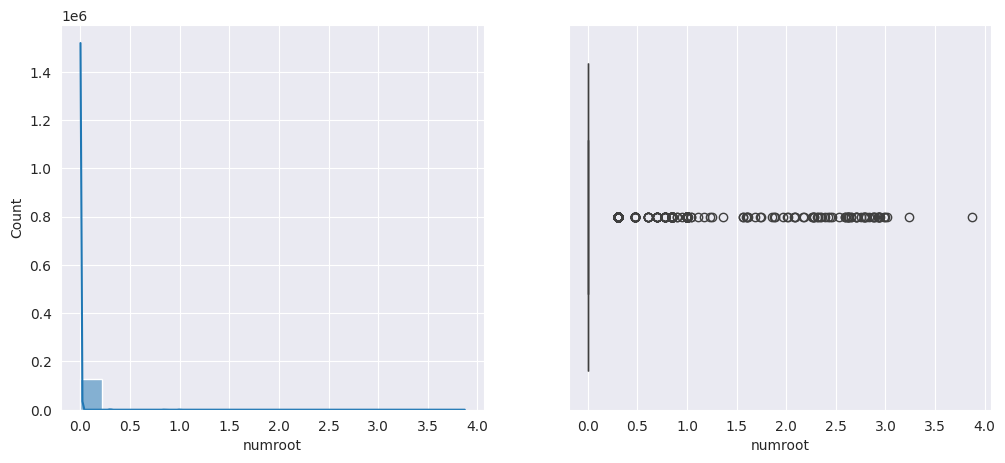

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(np.log10(df['numroot']+1),kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log10(df['numroot']+1))

In [ ]:
df['numfilecreations'].nunique()

35

In [ ]:
pd.DataFrame(df['numfilecreations'].describe()).T

,count,mean,std,min,25%,50%,75%,max
numfilecreations,125973.0,0.012669,0.483935,0.0,0.0,0.0,0.0,43.0


<Axes: xlabel='numfilecreations'>

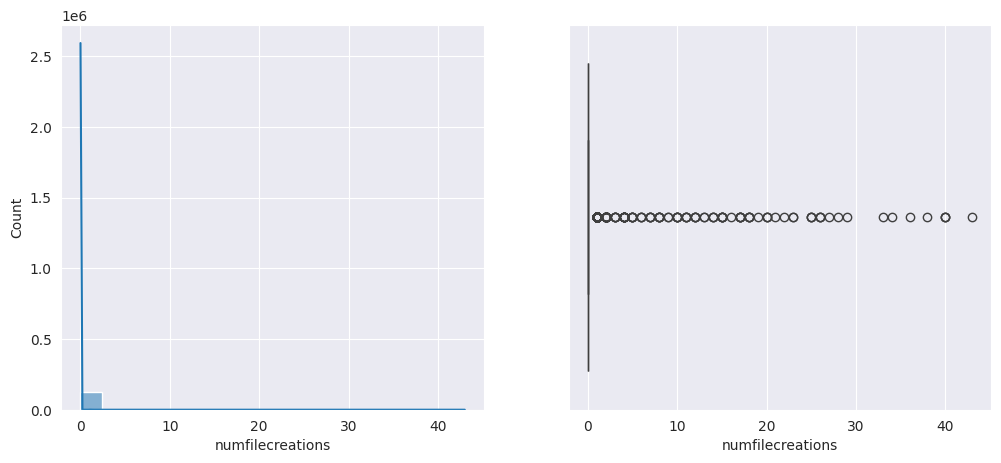

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='numfilecreations',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='numfilecreations')

In [ ]:
df['numshells'].value_counts(normalize=True)

,proportion
numshells,
0,0.999627
1,0.000333
2,0.000040


In [ ]:
df['numaccessfiles'].value_counts()

,count
numaccessfiles,
0,125602
1,313
2,29
3,8
5,6
4,5
6,4
8,3
7,2


In [ ]:
df['numaccessfiles'].value_counts(normalize=True)

,proportion
numaccessfiles,
0,0.997055
1,0.002485
2,0.000230
3,0.000064
5,0.000048
4,0.000040
6,0.000032
8,0.000024
7,0.000016


In [ ]:
df['numoutboundcmds'].value_counts()

,count
numoutboundcmds,
0,125973


In [ ]:
df['ishostlogin'].value_counts()

,count
ishostlogin,
0,125972
1,1


In [ ]:
df['isguestlogin'].value_counts(normalize=True)

,proportion
isguestlogin,
0,0.990577
1,0.009423


In [ ]:
pd.DataFrame(df['serrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
serrorrate,125973.0,0.284485,0.446456,0.0,0.0,0.0,1.0,1.0


<Axes: xlabel='serrorrate'>

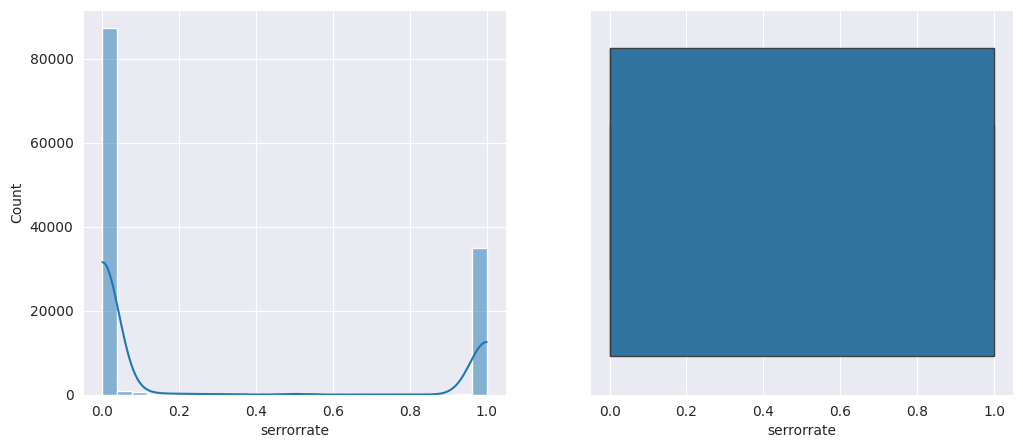

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='serrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='serrorrate')

In [ ]:
pd.DataFrame(df['rerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
rerrorrate,125973.0,0.119958,0.320436,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='rerrorrate'>

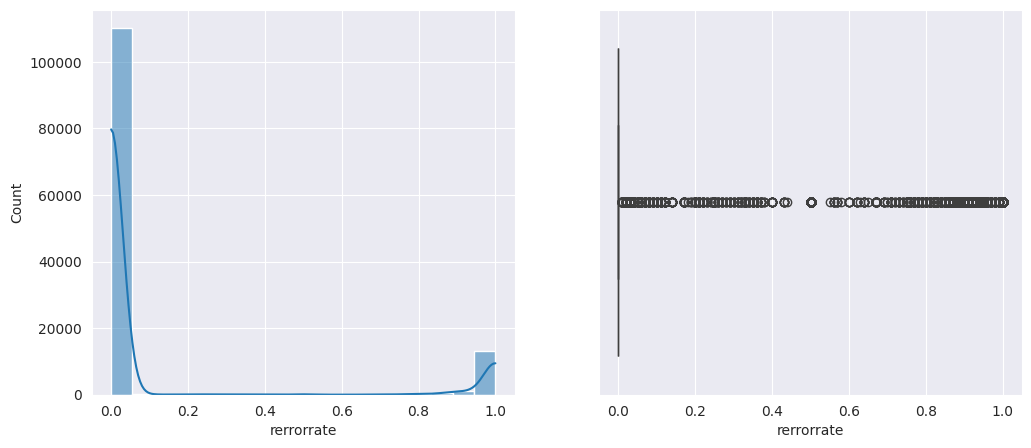

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='rerrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='rerrorrate')

In [ ]:
pd.DataFrame(df['srvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvserrorrate,125973.0,0.282485,0.447022,0.0,0.0,0.0,1.0,1.0


<Axes: xlabel='srvserrorrate'>

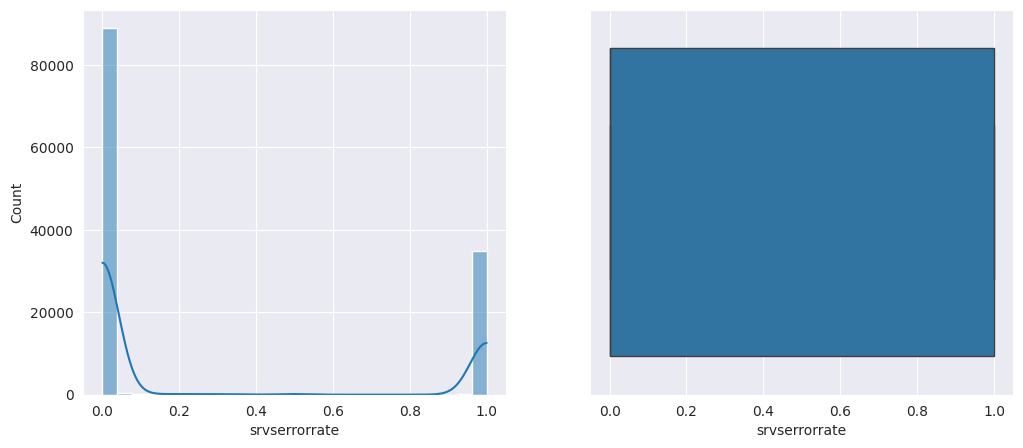

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='srvserrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='srvserrorrate')

In [ ]:
pd.DataFrame(df['srvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvrerrorrate,125973.0,0.121183,0.323647,0.0,0.0,0.0,0.0,1.0


In [ ]:
np.percentile(df['srvrerrorrate'],75) + 1.5*(np.percentile(df['srvrerrorrate'],75)-np.percentile(df['srvrerrorrate'],25))

0.0

<Axes: xlabel='srvrerrorrate'>

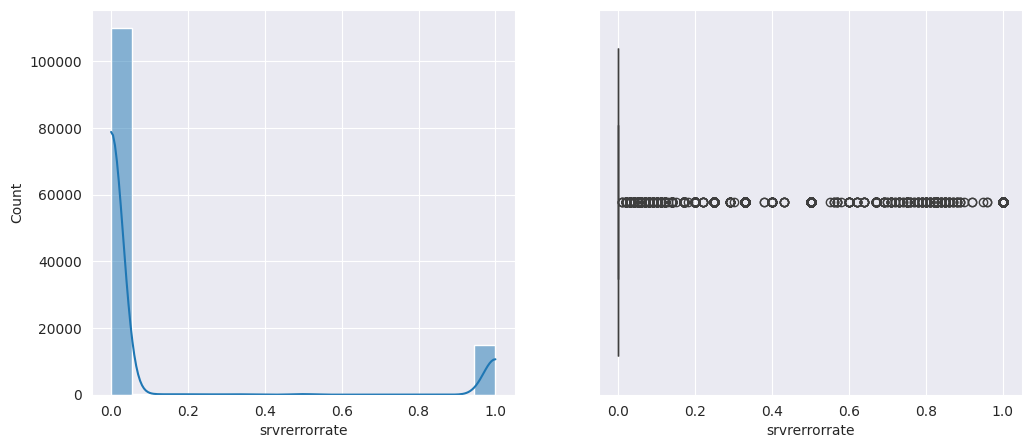

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='srvrerrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='srvrerrorrate')

In [ ]:
pd.DataFrame(df['samesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
samesrvrate,125973.0,0.660928,0.439623,0.0,0.09,1.0,1.0,1.0


<Axes: xlabel='samesrvrate'>

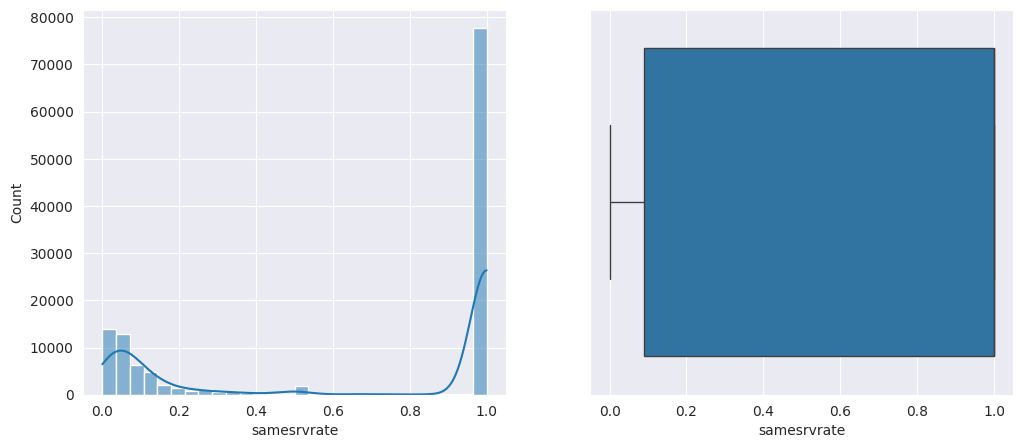

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='samesrvrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='samesrvrate')

In [ ]:
pd.DataFrame(df['diffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
diffsrvrate,125973.0,0.063053,0.180314,0.0,0.0,0.0,0.06,1.0


In [ ]:
np.percentile(df['diffsrvrate'],75) + 1.5*(np.percentile(df['diffsrvrate'],75)-np.percentile(df['diffsrvrate'],25))

0.15

<Axes: xlabel='diffsrvrate'>

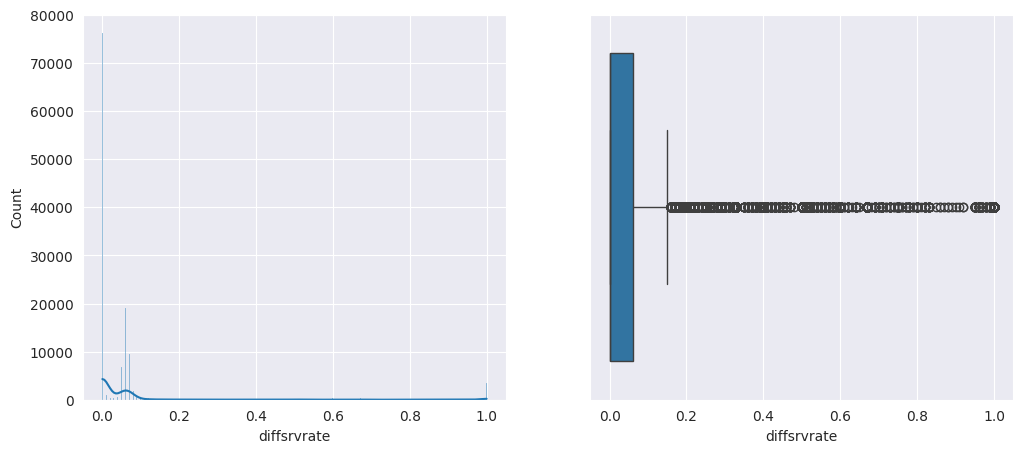

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='diffsrvrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='diffsrvrate')

In [ ]:
pd.DataFrame(df['srvdiffhostrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvdiffhostrate,125973.0,0.097322,0.25983,0.0,0.0,0.0,0.0,1.0


In [ ]:
np.percentile(df['srvdiffhostrate'],75) + 1.5*(np.percentile(df['srvdiffhostrate'],75)-np.percentile(df['srvdiffhostrate'],25))

0.0

<Axes: xlabel='srvdiffhostrate'>

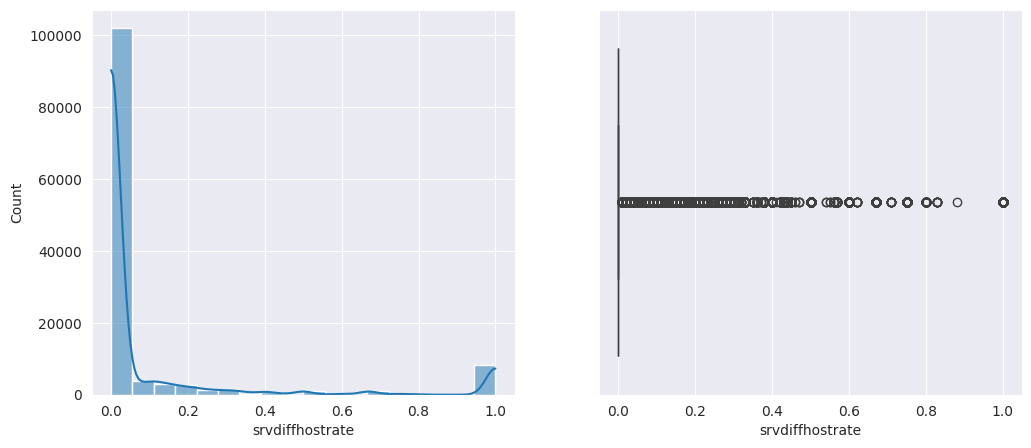

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='srvdiffhostrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='srvdiffhostrate')

In [ ]:
pd.DataFrame(df['dsthostcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostcount,125973.0,182.148945,99.206213,0.0,82.0,255.0,255.0,255.0


<Axes: xlabel='dsthostcount'>

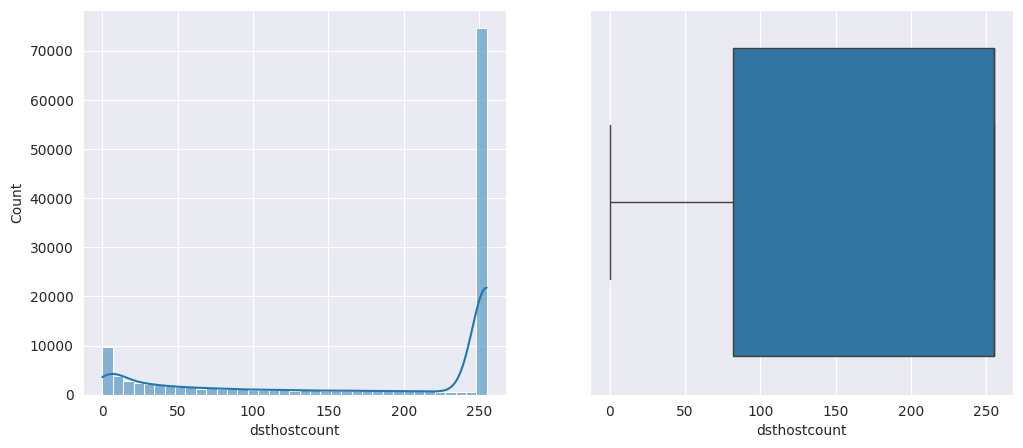

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostcount',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostcount')

In [ ]:
pd.DataFrame(df['dsthostsrvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvcount,125973.0,115.653005,110.702741,0.0,10.0,63.0,255.0,255.0


<Axes: xlabel='dsthostsrvcount'>

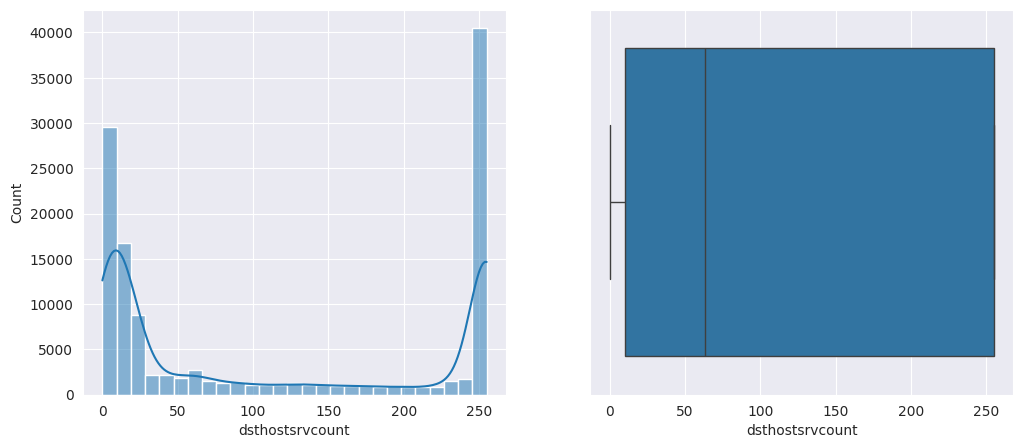

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostsrvcount',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsrvcount')

In [ ]:
pd.DataFrame(df['dsthostsamesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrvrate,125973.0,0.521242,0.448949,0.0,0.05,0.51,1.0,1.0


<Axes: xlabel='dsthostsamesrvrate'>

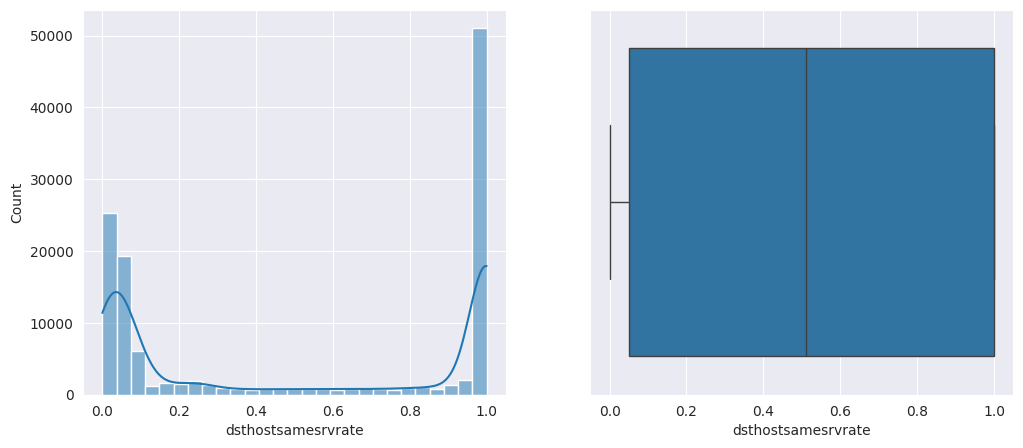

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostsamesrvrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsamesrvrate')

In [ ]:
pd.DataFrame(df['dsthostdiffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostdiffsrvrate,125973.0,0.082951,0.188922,0.0,0.0,0.02,0.07,1.0


In [ ]:
np.percentile(df['dsthostdiffsrvrate'],75) + 1.5*(np.percentile(df['dsthostdiffsrvrate'],75)-np.percentile(df['dsthostdiffsrvrate'],25))

0.17500000000000002

<Axes: xlabel='dsthostdiffsrvrate'>

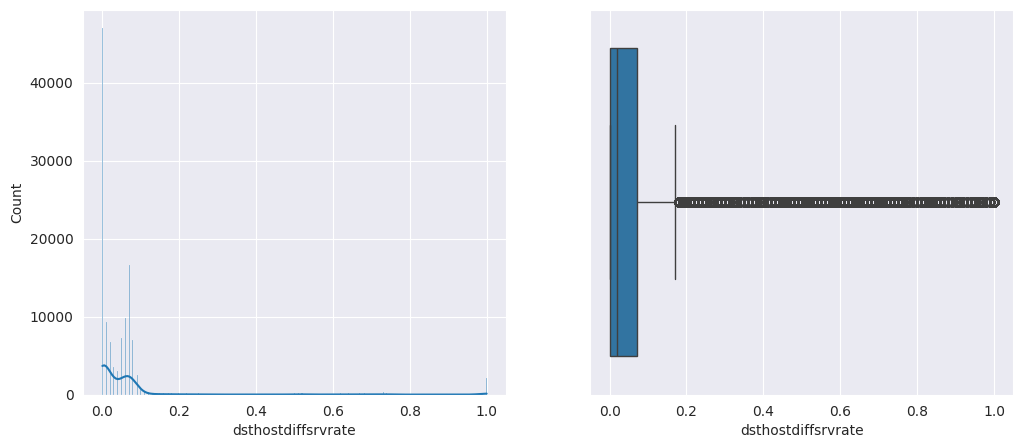

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostdiffsrvrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostdiffsrvrate')

In [ ]:
pd.DataFrame(df['dsthostsamesrcportrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrcportrate,125973.0,0.148379,0.308997,0.0,0.0,0.0,0.06,1.0


In [ ]:
np.percentile(df['dsthostsamesrcportrate'],75) + 1.5*(np.percentile(df['dsthostsamesrcportrate'],75)-np.percentile(df['dsthostsamesrcportrate'],25))

0.15

<Axes: xlabel='dsthostsamesrcportrate'>

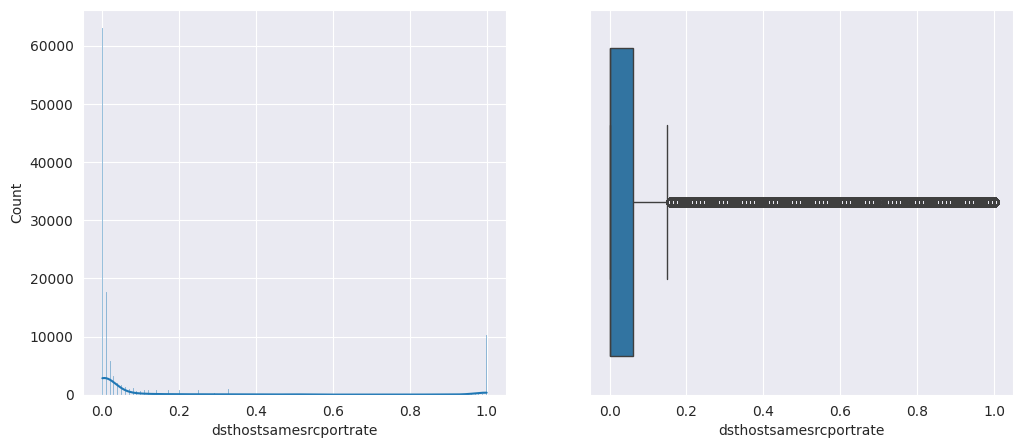

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostsamesrcportrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsamesrcportrate')

In [ ]:
pd.DataFrame(df['dsthostsrvdiffhostrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvdiffhostrate,125973.0,0.032542,0.112564,0.0,0.0,0.0,0.02,1.0


In [ ]:
np.percentile(df['dsthostsrvdiffhostrate'],75) + 1.5*(np.percentile(df['dsthostsrvdiffhostrate'],75)-np.percentile(df['dsthostsrvdiffhostrate'],25))

0.05

<Axes: xlabel='dsthostsrvdiffhostrate'>

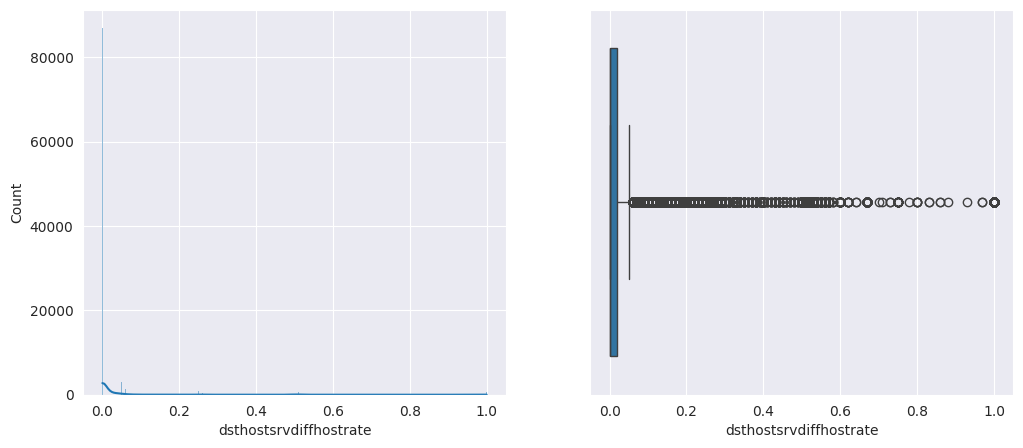

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostsrvdiffhostrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsrvdiffhostrate')

In [ ]:
pd.DataFrame(df['dsthostserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostserrorrate,125973.0,0.284452,0.444784,0.0,0.0,0.0,1.0,1.0


<Axes: xlabel='dsthostserrorrate'>

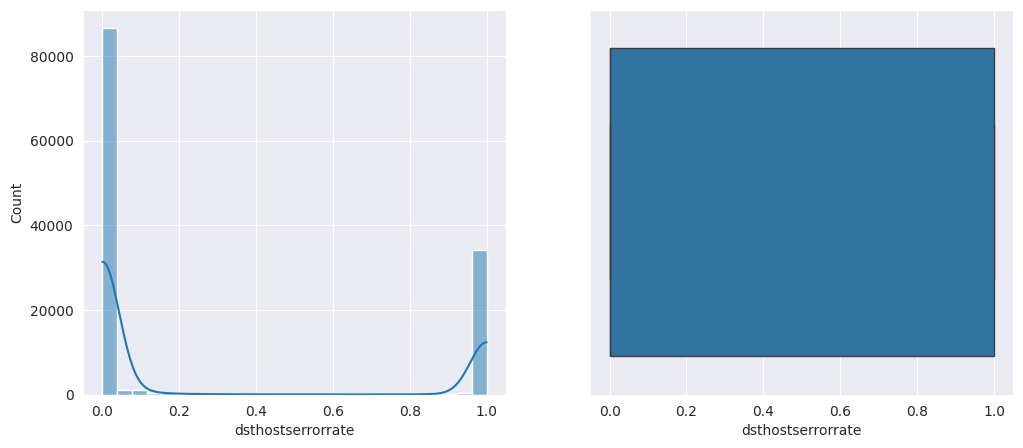

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostserrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostserrorrate')

In [ ]:
pd.DataFrame(df['dsthostsrvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvserrorrate,125973.0,0.278485,0.445669,0.0,0.0,0.0,1.0,1.0


<Axes: xlabel='dsthostsrvserrorrate'>

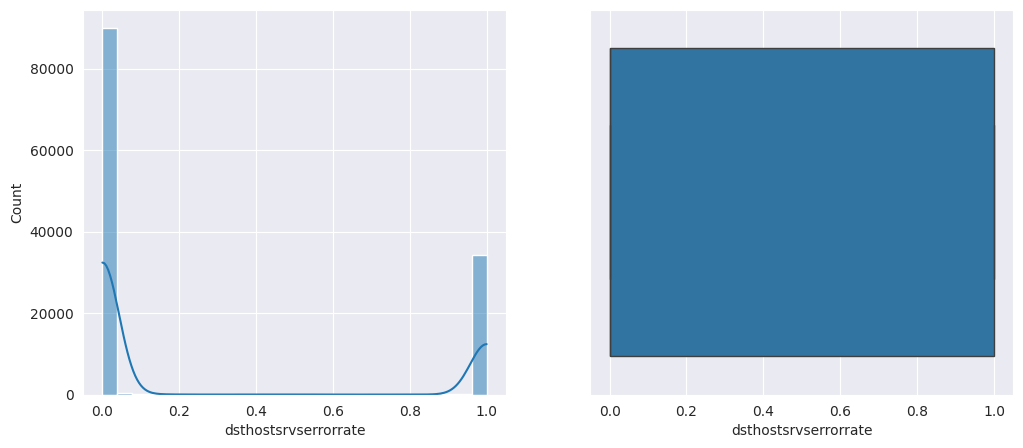

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostsrvserrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsrvserrorrate')

In [ ]:
pd.DataFrame(df['dsthostrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostrerrorrate,125973.0,0.118832,0.306557,0.0,0.0,0.0,0.0,1.0


In [ ]:
np.percentile(df['dsthostrerrorrate'],75) + 1.5*(np.percentile(df['dsthostrerrorrate'],75)-np.percentile(df['dsthostrerrorrate'],25))

0.0

<Axes: xlabel='dsthostrerrorrate'>

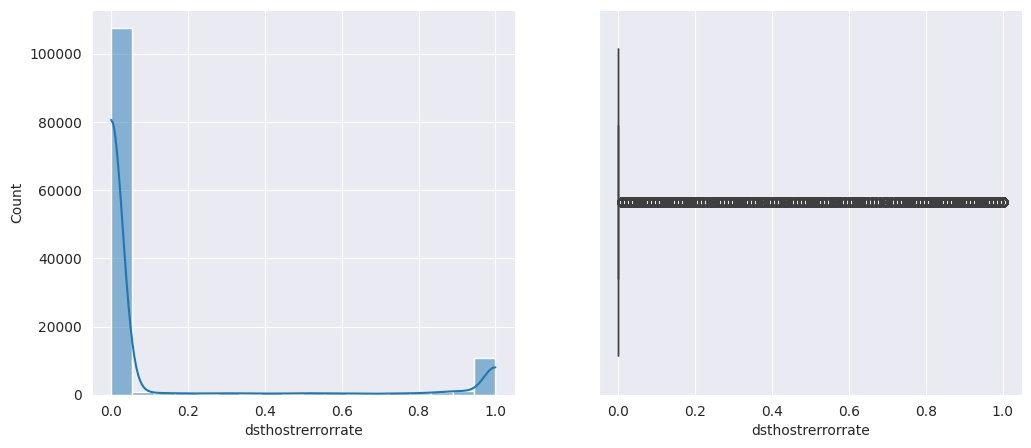

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostrerrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostrerrorrate')

In [ ]:
pd.DataFrame(df['dsthostsrvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvrerrorrate,125973.0,0.12024,0.319459,0.0,0.0,0.0,0.0,1.0


In [ ]:
np.percentile(df['dsthostsrvrerrorrate'],75) + 1.5*(np.percentile(df['dsthostsrvrerrorrate'],75)-np.percentile(df['dsthostsrvrerrorrate'],25))

0.0

<Axes: xlabel='dsthostsrvrerrorrate'>

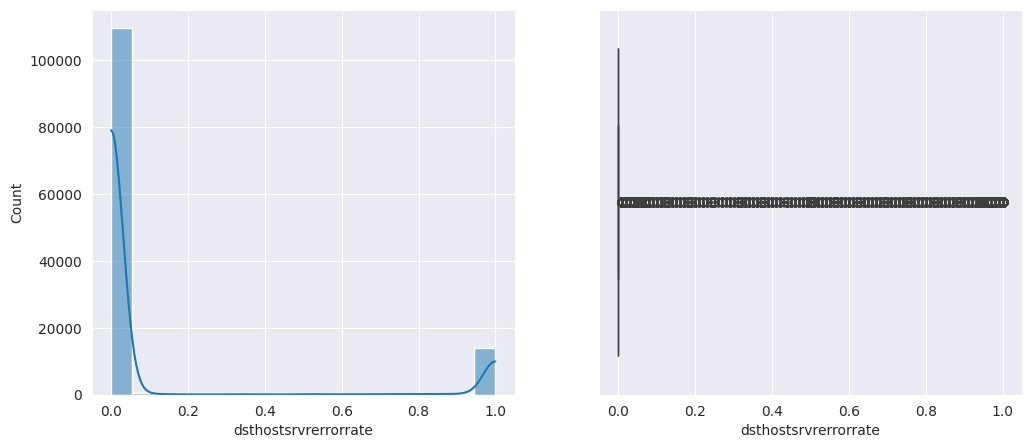

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='dsthostsrvrerrorrate',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsrvrerrorrate')

In [ ]:
pd.DataFrame(df['lastflag'].describe()).T

,count,mean,std,min,25%,50%,75%,max
lastflag,125973.0,19.50406,2.291503,0.0,18.0,20.0,21.0,21.0


In [ ]:
np.percentile(df['lastflag'],25) - 1.5*(np.percentile(df['lastflag'],75)-np.percentile(df['lastflag'],25))

13.5

<Axes: xlabel='lastflag'>

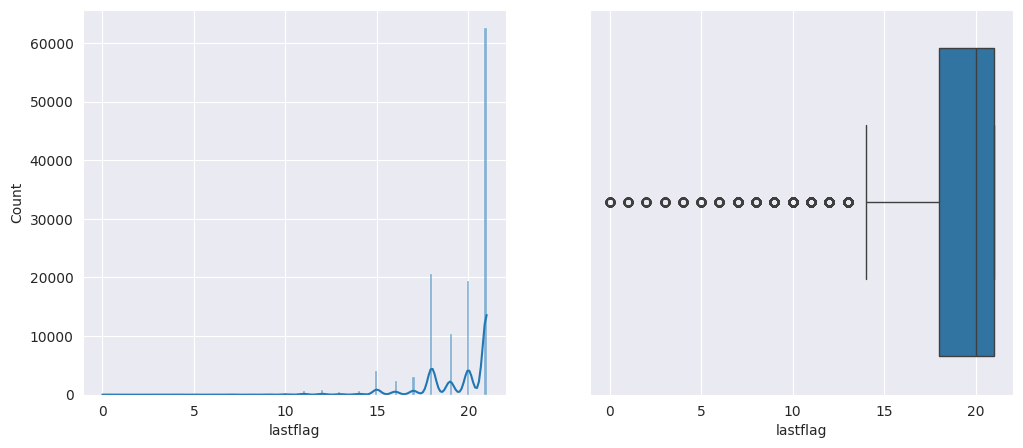

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='lastflag',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='lastflag')

<Axes: xlabel='attack'>

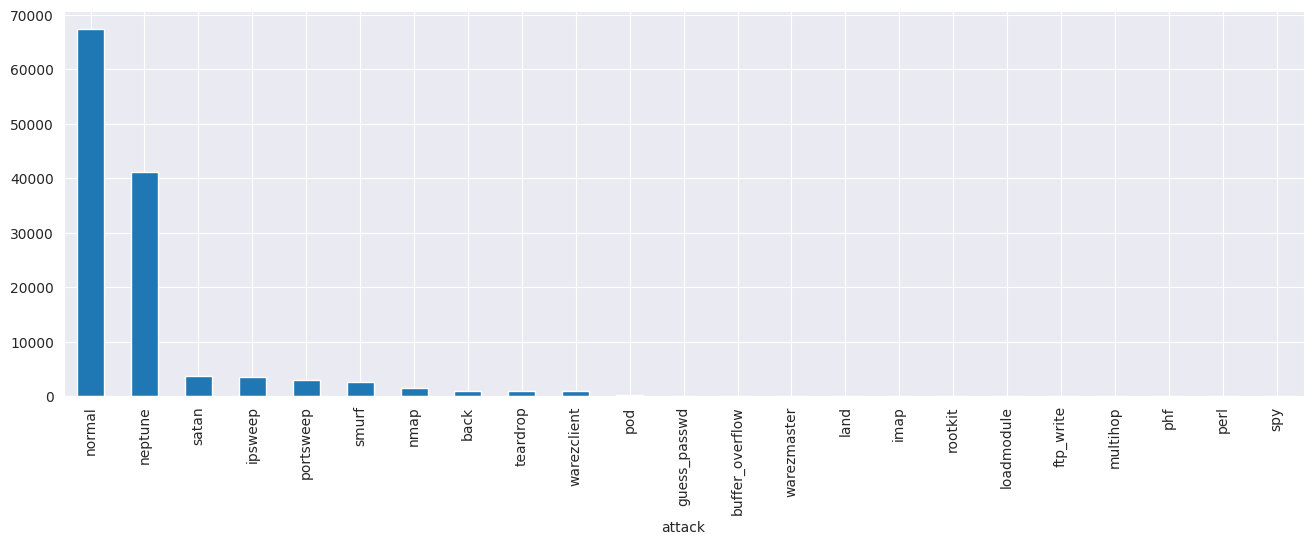

In [ ]:
plt.figure(figsize=(16,5))
df['attack'].value_counts().plot(kind='bar')

In [ ]:
df['is_attack'].value_counts()

,count
is_attack,
0,67343
1,58630


In [ ]:
pd.merge(df['attack'].value_counts(normalize=True).head(10),df['attack'].value_counts().head(10),left_index=True, right_index=True)

,proportion,count
attack,,
normal,0.534583,67343
neptune,0.327165,41214
satan,0.028840,3633
ipsweep,0.028570,3599
portsweep,0.023267,2931
smurf,0.021005,2646
nmap,0.011852,1493
back,0.007589,956
teardrop,0.007081,892


In [ ]:
tcols = df.loc[:,'serrorrate':'srvdiffhostrate'].columns

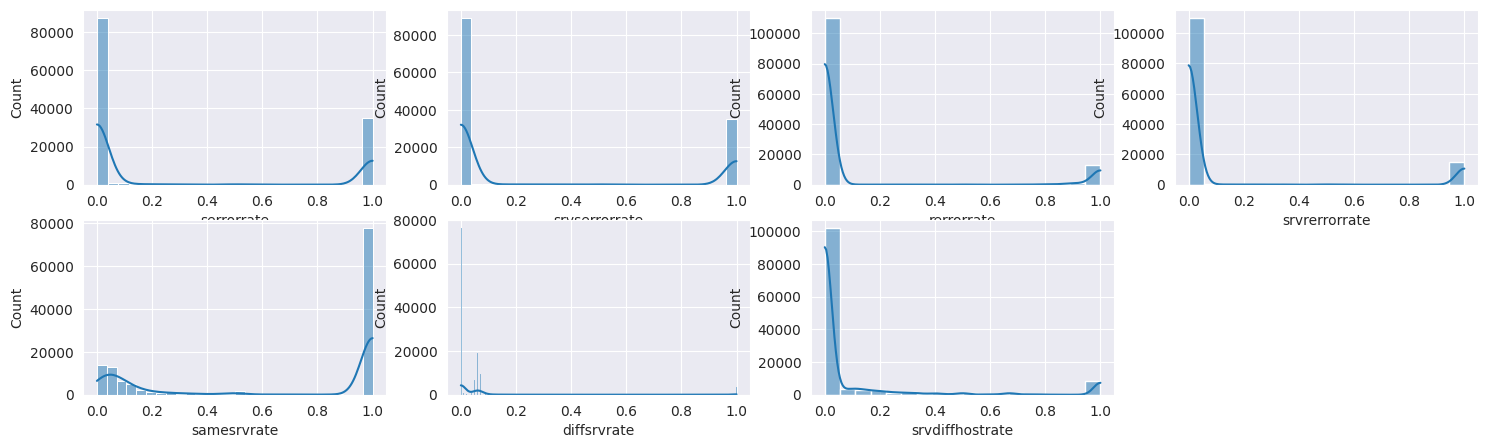

In [ ]:
pcount = 1
plt.figure(figsize=(18,5))
for col in tcols:
  plt.subplot(2,4,pcount)
  sns.histplot(data=df,x=col,kde=True)
  pcount += 1